In [1]:
import Diffusion_1D
import numpy as np
import matplotlib.pyplot as plt


In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from dataset import AirfoilDataset

def plot_airfoils(airfoil_x, airfoil_y):
    '''
    plot airfoils: no need to modify 
    '''
    idx = 0
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
    for row in ax:
        for col in row:
            col.scatter(airfoil_x, airfoil_y[idx, :], s=0.6, c='black')
            col.axis('off')
            col.axis('equal')
            idx += 1
    plt.show()

In [3]:
dataset = AirfoilDataset(path='cleaned_airfoils/')
airfoil_x = dataset.get_x()
y_coordinates = dataset.get_y()
airfoil_dim = airfoil_x.shape[0]
print("airfoil_dim: ",airfoil_dim)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)



airfoil_dim:  200


In [4]:
model = Diffusion_1D.Unet1D(
    dim=8,  # Adjust based on the complexity of your data
    channels=1,  # Single channel for y-coordinates
    dim_mults=(1, 2, 4, 8),  # Example configuration; adjust as necessary
    resnet_block_groups=1
)



In [5]:
diffusion_model = Diffusion_1D.GaussianDiffusion1D(
    model,
    timesteps=1000, 
    seq_length=200,
    objective='pred_noise'
)

In [8]:
trainer = Diffusion_1D.Trainer1D(
    diffusion_model=diffusion_model,
    dataset=dataset,
    train_batch_size=64,
    train_num_steps=10000,
)
trainer.train()

/home/reid/anaconda3/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(split_batches=True)
  warnings.warn(


  0%|          | 0/10000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

training complete


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

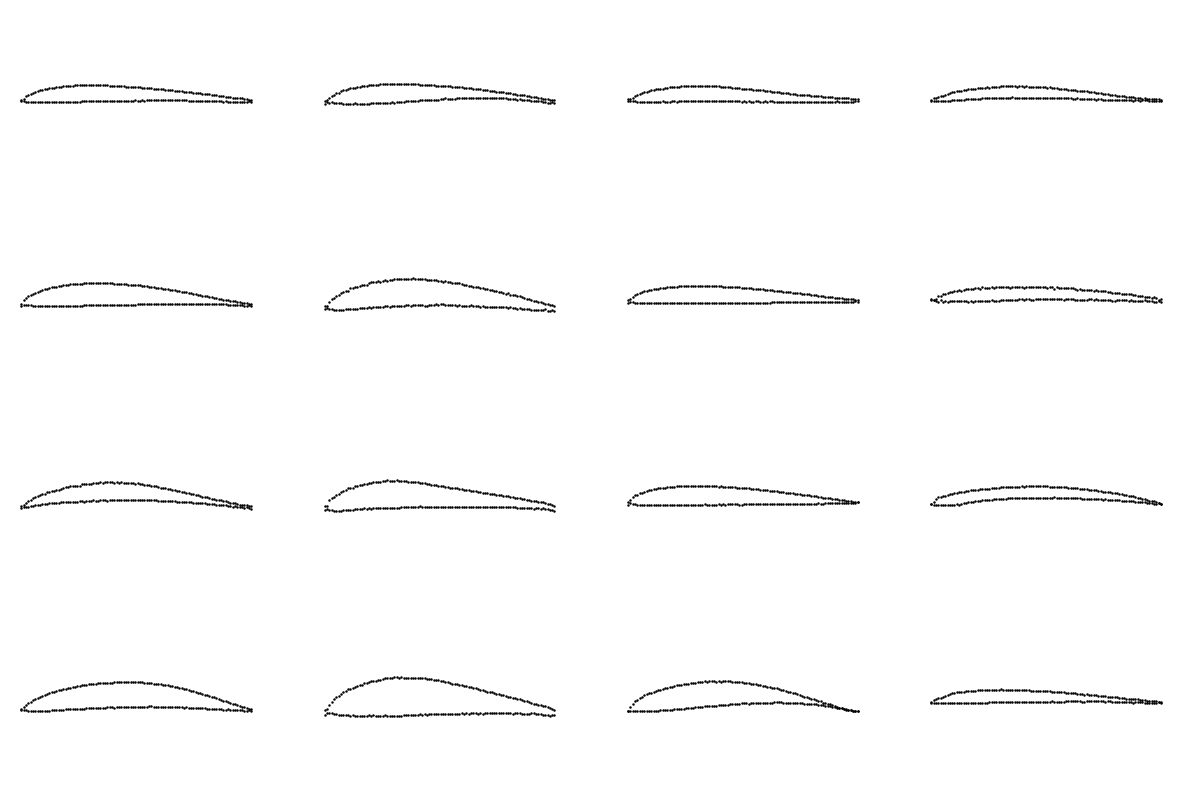

In [11]:
sampled_airfoils = diffusion_model.sample(16)
sampled_airfoils = sampled_airfoils.to('cpu')
plot_airfoils(airfoil_x, sampled_airfoils.squeeze().detach().numpy())
